## Checking how the weights dependes on the constant C (weight of logstic loss)

In [1]:
import pandas as pd
from utils import run_experiment_and_collect_weights
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 


spambase = fetch_ucirepo(id=94) 
  
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)


accuracies , _ , optimal_weights = run_experiment_and_collect_weights(X, y)

## Fraction of non-zero elements in model parameters

In [2]:
C = []
non_zero_weights_n = []
non_zero_weights_p = []

for c, val in optimal_weights.items():
    
    optimal_n = np.array(val[0]['Optimal n'])
    optimal_p = np.array(val[0]['Optimal p'])
    
    C.append(c)
    non_zero_weights_n.append((optimal_n != 0).sum() / optimal_n.shape[0])
    non_zero_weights_p.append((optimal_p != 0).sum() / optimal_p.shape[0])

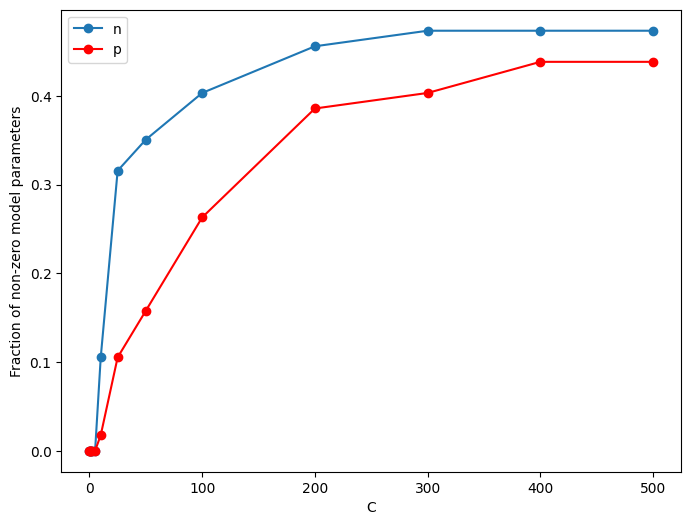

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(C, non_zero_weights_n, marker='o', label='n')
ax.plot(C, non_zero_weights_p, marker='o', color='r', label='p')
ax.set_xlabel("C")
ax.set_ylabel("Fraction of non-zero model parameters")
ax.legend()

## Plot each model parameter separately

In [4]:
matrix_n = []
matrix_p = []

for c, val in optimal_weights.items():
    optimal_n = np.array(val[0]['Optimal n'])
    optimal_p = np.array(val[0]['Optimal p'])
    
    matrix_n.append(optimal_n)
    matrix_p.append(optimal_p)
    
matrix_n = pd.DataFrame(matrix_n)
matrix_n['x'] = C
matrix_p = pd.DataFrame(matrix_p)
matrix_p['x'] = C

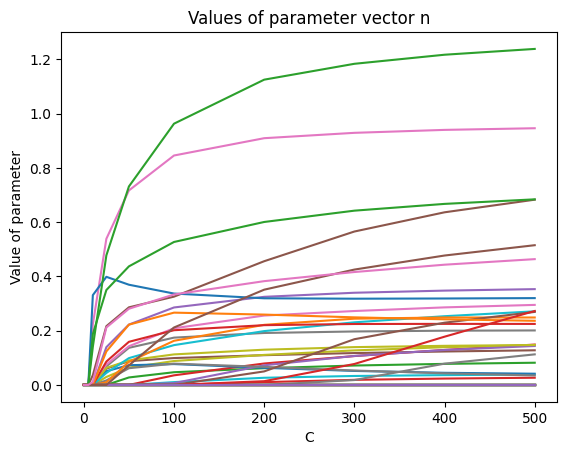

In [5]:
matrix_n.plot(x='x', legend = False)
plt.xlabel('C')
plt.ylabel('Value of parameter')
plt.title('Values of parameter vector n')
plt.show()

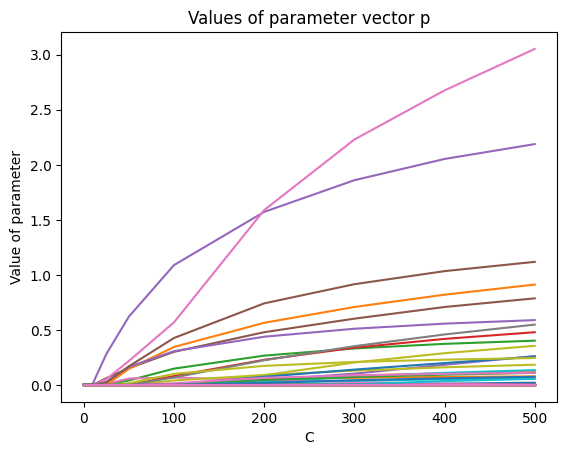

In [6]:
matrix_p.plot(x='x', legend = False)
plt.xlabel('C')
plt.ylabel('Value of parameter')
plt.title('Values of parameter vector p')
plt.show()

## Value of C vs accuracy

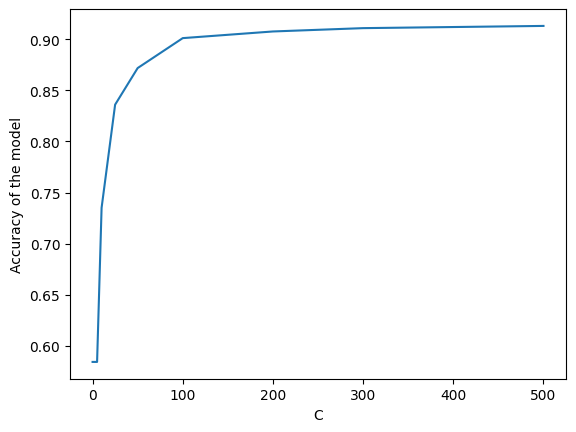

In [7]:
plt.plot(C, accuracies.values())
plt.xlabel('C')
plt.ylabel('Accuracy of the model')
plt.show()